In [1]:

# Supply chain management (SCM) involves the coordination and optimization of various processes to ensure the 
# efficient flow of goods and services from the point of origin to the final consumer. A common problem in supply 
# chain management is optimizing inventory levels to minimize costs while meeting demand. 

# Let's say are managing inventory for a retail store, and you want to determine the optimal order quantity 
# for a product to minimize holding costs and stockouts.


In [2]:

import pandas as pd
import numpy as np

np.random.seed(42)

# Generate sample data
products = ['Product_A', 'Product_B', 'Product_C']
demand_mean = [50, 30, 40]
demand_std = [10, 5, 8]
lead_time_mean = [5, 3, 4]
lead_time_std = [1, 0.5, 0.8]

data = {
    'Product': np.repeat(products, 12),
    'Month': np.tile(range(1, 13), len(products)),
    'Demand': np.random.normal(np.repeat(demand_mean, 12), np.repeat(demand_std, 12)),
    'LeadTime': np.random.normal(np.repeat(lead_time_mean, 12), np.repeat(lead_time_std, 12))
}

df = pd.DataFrame(data)
df


def calculate_eoq(demand, holding_cost, ordering_cost):
    """
    Calculate Economic Order Quantity (EOQ).
    """
    return np.sqrt((2 * demand * ordering_cost) / holding_cost)

def calculate_optimal_order_quantity(df, holding_cost, ordering_cost):
    """
    Calculate the optimal order quantity for each product.
    """
    df['EOQ'] = df.apply(lambda row: calculate_eoq(row['Demand'], holding_cost, ordering_cost), axis=1)
    df['OptimalOrderQuantity'] = np.round(df['EOQ']).astype(int)
    return df

# Assume holding cost and ordering cost for each product
holding_cost = 2  # Cost of holding one unit in inventory for one month
ordering_cost = 50  # Cost of placing one order

df = calculate_optimal_order_quantity(df, holding_cost, ordering_cost)
df.head()


,Product,Month,Demand,LeadTime,EOQ,OptimalOrderQuantity
0,Product_A,1,54.967142,5.208864,52.424775,52
1,Product_A,2,48.617357,3.040330,49.303832,49
2,Product_A,3,56.476885,3.671814,53.139856,53
3,Product_A,4,65.230299,5.196861,57.109675,57
4,Product_A,5,47.658466,5.738467,48.815196,49


In [3]:

# EOQ = Economic Order Quantity

# EOQ is a calculation that helps businesses determine the optimal order quantity to minimize the total 
# inventory costs, which include ordering costs and holding costs.

# The goal of EOQ is to find the order quantity that minimizes the total costs associated with ordering 
# and holding inventory.


# EOQ = OptimalOrderQuantity

# Optimal Order Quantity, in the context of the supply chain management example, refers to the specific 
# quantity that has been calculated as the optimal order quantity using the EOQ model.

# This is the order quantity that, according to the EOQ model, will result in the lowest total cost.


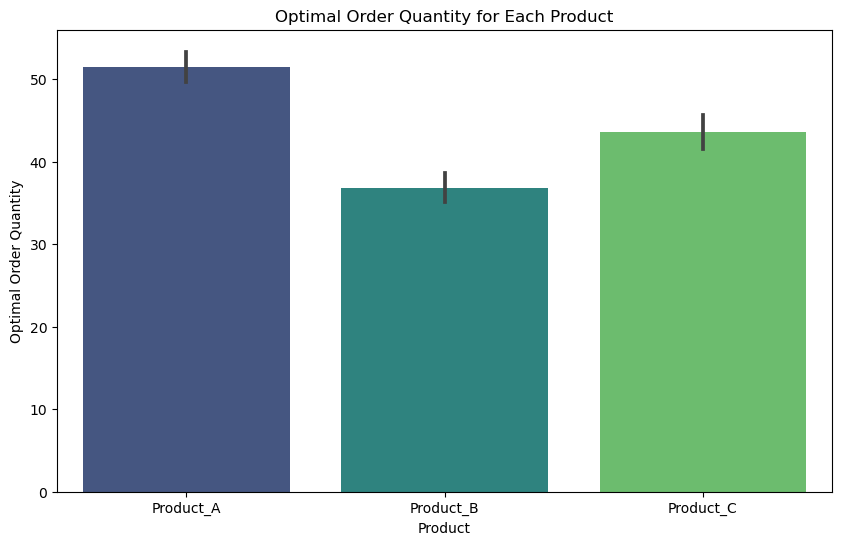

In [4]:

import matplotlib.pyplot as plt
import seaborn as sns

# Plot the optimal order quantity
plt.figure(figsize=(10, 6))
sns.barplot(x='Product', y='OptimalOrderQuantity', data=df, palette='viridis')
plt.title('Optimal Order Quantity for Each Product')
plt.xlabel('Product')
plt.ylabel('Optimal Order Quantity')
plt.show()


In [5]:

# This is a simplified example, and real-world supply chain problems can be much more complex, involving multiple 
# products, suppliers, warehouses, and distribution centers. More advanced optimization models, such as the 
# Newsvendor Model or stochastic programming or ScipyOptimize, may be more applicable in certain scenarios.
